In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt


In [46]:
def standard_score(data):
    data = np.array(data)
    return (data - data.mean()) / data.std()

In [124]:
def initalise_data(fn):
    '''
    x = horizontal slice
    y = vertical sclice
    z = time
    '''

    data = loadmat(fn)
    print(data.keys())
    #vmag = data['ebmp5Mm']
    #vmag = data['evel2Mm_vh']
    vmag = data['evel1Mm_vh']
    print(vmag.shape)
    
    #return vmag[62, 1:62, :500]
    return np.transpose(vmag[:500, 1:62])

In [125]:
def fft_transform(data):
    fig, axs = plt.subplots(2)

    axs[0].set_xlabel('Time ($s$)')
    axs[0].set_ylabel('Amplitude ($Unit$)')
    axs[0].plot(data)

    
    #hann = np.hanning(len(data))

    #Yhann = np.fft.fft(hann * data)
    #Yhann = np.fft.fft(data)

    #N = int(len(Yhann) / 2 + 1)
    
    
    hann = np.hanning(len(data))
    Y = np.fft.fft(hann*data)
    #Y = np.fft.fft(data)
    N = len(Y) // 2 + 1
    print(N)
    #X = np.linspace(0, 0.05, N, endpoint=True)
    X=np.linspace(0,0.01257,N)
    #X = np.reciprocal(X)
    #X=X/60
    

    axs[1].set_xlabel('Period ($s$)')
    axs[1].set_ylabel('Amplitude ($Unit$)')
    #return axs[1].plot(X, 2.0 * np.abs(Y[1:N]/N))
    return axs[1].plot(X[1:80], 2.0 * np.abs(Y[1:80]/N))


In [126]:
# Read the data, 2d matrix
directory='simdata/100g/'
#filepath=directory+'bzvtime'
filepath=directory+'spic_5b2_2_bv100G_ydir_vvt'
#filepath=directory+'spic_5b2_2_ydir_vvt'
#filepath=directory+'pvvt'
vmag = initalise_data(filepath)

print((vmag.shape))

# Generate 1 dmeinsional slices at 10, 20 ,30, 40, 50
y = [standard_score(vmag[(x * 10), :]) for x in range(1, 6)]
#y = [standard_score(vmag[:,(x * 10)]) for x in range(1, 6)]



dict_keys(['__header__', '__version__', '__globals__', 'ans', 'None', 'bdir', 'rdirectory', 'directory', 'extension', 'ndirectory', 'nextension', 'wspacename', 'nt', 'evelchrom_vh', 'eveltran_vh', 'evelcor_vh', 'evel2Mm_vh', 'evel1Mm_vh', 'evelp5Mm_vh', 'i', 'id', 'filename', 'timetext', 'imfile', 'fid', 'headline', 'it', 'time', 'ndim', 'neqpar', 'nw', 'nx', 'nxs', 'varbuf', 'gamma', 'g', 'eta', 'varnames', 'idim', 'X', 'iw', 'w', 'xx', 'yy', 'zz', 'wd', 'nx1', 'nx2', 'nx3', 'x', 'y', 'z', 'nrange', 'ax', 'ay', 'az', 'x1', 'x2', 'x3', 'val1', 'val2', 'myval', 'R', 'mu', 'mu_gas', 'max1', 'max2', 'max3', 'min1', 'min2', 'min3', 'maxval', 'minval', '__function_workspace__'])
(700, 124)
(61, 500)


251
251
251


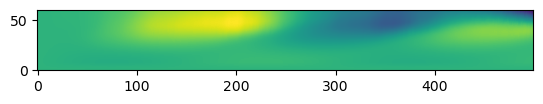

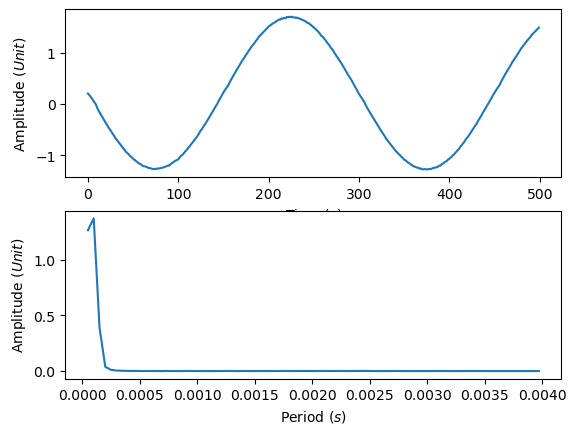

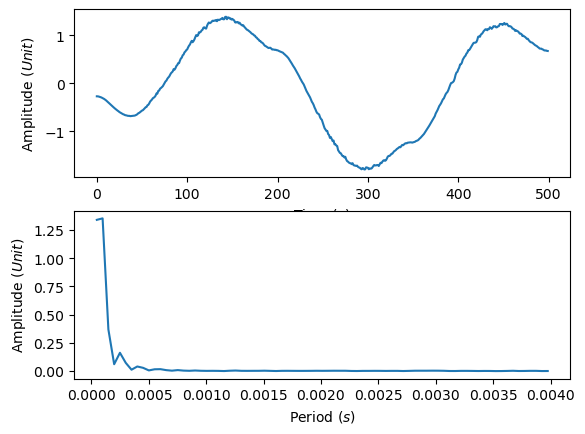

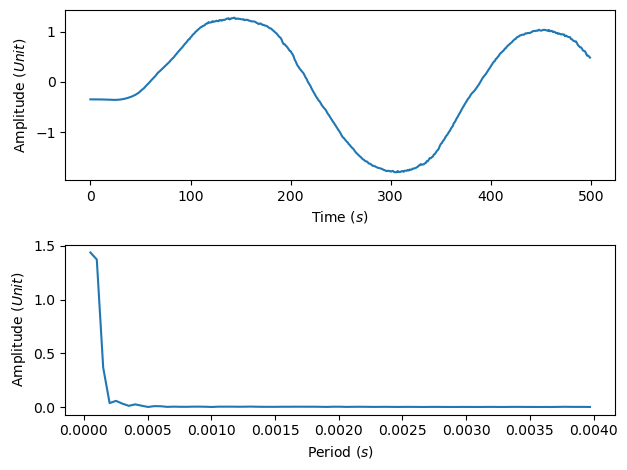

In [127]:
plt.figure(1)
plt.imshow(vmag, origin='lower')


#plt.figure(2)
#plt.plot(y[2])
#testm=y[0]
#fft_transform(testm)

fft_transform(y[0])
fft_transform(y[1])
fft_transform(y[2])

plt.tight_layout()
plt.show()